# Table of Contents
### 1. Import libraries and data
### 2. Data cleaning
### 3. Data prep for analysis
### 4. Regression analysis

## 1. Import libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Prompt matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Define path
path = r'/Users/ianfleming/Desktop/World Happiness Report Analysis'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','world_happiness.csv'),index_col=0)

In [5]:
# Check import
df.head()

,country_name,regional_indicator,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_in_national_government,conf_gov_missing,happiness_category,cluster
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072,0,Low,1
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545,0,Medium,1
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357,0,Medium,1
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386,0,Low,1
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440,0,Low,1


In [6]:
df.shape

(2199, 16)

## 2. Data Cleaning

In [7]:
df.isnull().sum()

country_name                           0
regional_indicator                     0
year                                   0
life_ladder                            0
log_gdp_per_capita                     0
social_support                         0
healthy_life_expectancy_at_birth       0
freedom_to_make_life_choices           0
generosity                             0
perceptions_of_corruption              0
positive_affect                        0
negative_affect                        0
confidence_in_national_government    361
conf_gov_missing                       0
happiness_category                     0
cluster                                0
dtype: int64

In [8]:
df.columns

Index(['country_name', 'regional_indicator', 'year', 'life_ladder',
       'log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices',
       'generosity', 'perceptions_of_corruption', 'positive_affect',
       'negative_affect', 'confidence_in_national_government',
       'conf_gov_missing', 'happiness_category', 'cluster'],
      dtype='object')

## 3. Data prep for anlaysis

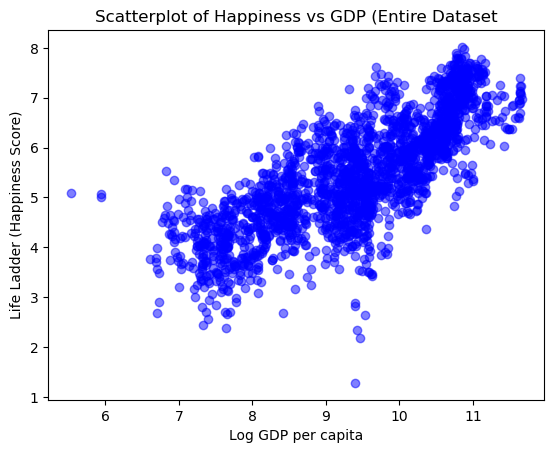

In [9]:
# Create a scatterplot 
plt.scatter(df["log_gdp_per_capita"], df["life_ladder"], color="blue", alpha=0.5)
plt.xlabel("Log GDP per capita")
plt.ylabel("Life Ladder (Happiness Score)")
plt.title("Scatterplot of Happiness vs GDP (Entire Dataset")
plt.show()

###Hypothesis
If GDP per capita increases, then the Happiness Score (Life Ladder) will also increase.  
This hypothesis is based on the assumption that higher income levels provide greater access to resources, security, and opportunities, which contribute positively to overall life satisfaction.


In [10]:
# Create df and keep only the columns we need
df_regr = df[["log_gdp_per_capita", "life_ladder"]].dropna()

In [11]:
df_regr.head()

,log_gdp_per_capita,life_ladder
0,7.350416,3.723590
1,7.508646,4.401778
2,7.613900,4.758381
3,7.581259,3.831719
4,7.660506,3.782938


In [12]:
# Reshape the variables into NumPy arrays and put them into separate objects. (X Independent and y Dependent)
X = df_regr["log_gdp_per_capita"].values.reshape(-1, 1)

y = df_regr["life_ladder"].values.reshape(-1, 1)


In [13]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression analysis

In [14]:
# Create regression object
regression = LinearRegression()

In [15]:
# Fit model
regression.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predict values for test set
y_predicted = regression.predict(X_test)

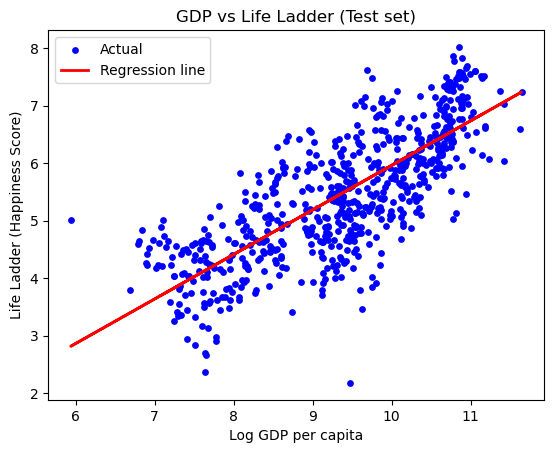

In [17]:
# Plot regression line
plot_test = plt
plot_test.scatter(X_test, y_test, color="blue", s=15, label="Actual")
plot_test.plot(X_test, y_predicted, color="red", linewidth=2, label="Regression line")
plot_test.title("GDP vs Life Ladder (Test set)")
plot_test.xlabel("Log GDP per capita")
plot_test.ylabel("Life Ladder (Happiness Score)")
plot_test.legend()
plot_test.show()

###Interpretation of regression line
The regression line on the test set shows a clear positive relationship between GDP per capita and the Happiness Score (Life Ladder). As GDP increases, predicted happiness scores also rise. The line captures the overall upward trend in the data on the scatterplot, though there is some spread of points around the line. This suggests that while GDP is an important predictor of happiness, other factors not included in this regression (such as social support, health, and freedom) might also influence the outcome. Overall, the line appears to fit the data reasonably well, but it does not account for all of the variation in happiness scores.


In [18]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [19]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.77397989]]
Mean squared error:  0.5058448911273651
R2 score:  0.5752454202689193


In [20]:
y_predicted

array([[3.70143703],
       [6.31589333],
       [5.17469785],
       [5.85516472],
       [3.78613389],
       [5.46359028],
       [6.4040734 ],
       [6.52397585],
       [6.68834517],
       [4.76747295],
       [5.45870537],
       [5.54145948],
       [4.74099272],
       [5.51450317],
       [5.85169405],
       [5.22838978],
       [4.09667219],
       [3.58420473],
       [4.88347959],
       [5.52755026],
       [5.14430482],
       [5.66329362],
       [5.18399822],
       [6.47460712],
       [6.0408769 ],
       [5.71496087],
       [4.39467714],
       [6.41793391],
       [5.2916419 ],
       [4.87726974],
       [4.36225575],
       [5.14415203],
       [4.51912202],
       [6.68425447],
       [6.17784924],
       [6.45230395],
       [5.28577455],
       [3.79958916],
       [4.93855698],
       [4.80256414],
       [5.26235311],
       [4.76184106],
       [5.48889753],
       [6.33603896],
       [4.53649526],
       [4.11242451],
       [6.06718145],
       [6.196

### Compare how the regression fits the training set

In [21]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [22]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [23]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [[0.77397989]]
Mean squared error:  0.495557594397347
R2 score:  0.6176996786628723


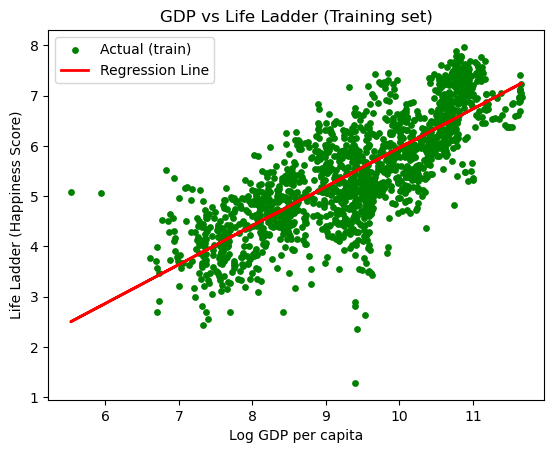

In [24]:
# Visualise the training set results
plot_train = plt
plot_train.scatter(X_train, y_train, color="green", s=15, label="Actual (train)")
plot_train.plot(X_train, y_predicted_train, color="red", linewidth=2, label="Regression Line")
plot_train.title("GDP vs Life Ladder (Training set)")
plot_train.xlabel("Log GDP per capita")
plot_train.ylabel("Life Ladder (Happiness Score)")
plot_train.legend()
plot_train.show()

In [25]:
# Save scatterplots
plt.savefig("gdp_life_test.png", dpi=300, bbox_inches="tight")  # for test set
plt.savefig("gdp_life_train.png", dpi=300, bbox_inches="tight") # for train set

In [26]:
# Export train scatterplot to world_happiness_analysis folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'gdp_happiness_train_scatterplot.png'))


In [27]:
# Export test scatterplot
plt.savefig(os.path.join(path,'04 Analysis', 'Visualisations', 'gdp_happiness_test_scatterplot.png'))


In [28]:
# Compare predicted versus actual values
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4.891037,3.701437
1,5.578691,6.315893
2,5.554374,5.174698
3,4.438440,5.855165
4,3.585127,3.786134
5,4.325472,5.463590
6,6.665274,6.404073
7,6.824284,6.523976
8,5.458051,6.688345
9,4.550499,4.767473


### Comparison of Actual vs Predicted Values
The predicted values are generally close to the actual scores, with small differences. This confirms that the model captures the overall trend between GDP and happiness, but it does not perfectly predict every observation. The differences highlight the influence of other factors not included in this regression.


### Reflections on Model Performance

The linear regression model demonstrates a clear positive relationship between GDP per capita and the Happiness Score (Life Ladder).  

- On the test set, the model achieved an R² of 0.58 and an MSE of 0.59.  
- On the training set, the model achieved an R² of 0.62 and an MSE of 0.49.  

These results are consistent across both sets, suggesting that the model is not strongly overfitting. The model explains around 58–62% of the variation in happiness scores, which is reasonably strong for a single predictor. However, the residual variation indicates that GDP per capita alone cannot fully explain differences in happiness across countries. Other important predictors (such as social support, health, and freedom) are not included in this regression model.  

There may also be data bias present. For example, wealthier regions may be overrepresented in the dataset, or cultural differences could affect how people report happiness.   




In [29]:
# Export df
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'world_happiness.csv'))

In [30]:
# Export visual
plot_test.figure.savefig(os.path.join(path,'04 Analysis', 'Visualisations', 'test_gdp_vs_happiness.png'))

AttributeError: 'function' object has no attribute 'savefig'

In [ ]:
# Export visual
plot_train.figure.savefig(os.path.join(path,'04 Analysis', 'Visualisations', 'train_gdp_vs_happiness.png'))